*****************************************
# Artificial Event Simulation
*****************************************

In [1]:
import cait as ai
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']  # we need this for a suitable resolution of the plots

In [2]:
path_data = 'test_data/'
fname = 'test_001'
channels_rdt = [0,1]
channels_h5 = [0,1]

In [3]:
dh = ai.DataHandler(channels=channels_rdt)
dh.set_filepath(path_h5=path_data,
                fname=fname,
                appendix=False)  # this specifies, that the file does not have a "-P_Ch0..." appendix

DataHandler Instance created.


## Resolution

In [4]:
dh.simulate_pulses(path_sim='test_data/resolution_001.h5',
                   size_events=100,  # should be below Nmbr of baselines, otherwise activate reuse_bl
                   reuse_bl=False,
                   ev_discrete_phs=[[1], [1]],
                   t0_interval=[-5, 5],
                   rms_thresholds=[0.1, 0.4],
                   fake_noise=False)

Simulating Events.
Get Baselines.
Get Pulse Heights.
Add Pulses to Baselines.
Store OF.
Simulation done.


In [3]:
dh_res = ai.DataHandler(channels=[0,1])
dh_res.set_filepath(path_h5='test_data/', fname='resolution_001', appendix=False)

DataHandler Instance created.


In [17]:
dh_res.apply_of()
dh_res.calc_mp(type='events')
dh_res.apply_sev_fit(type='events', down=1, verb=True, events_to_fit=100)

Calculating OF Heights.
CALCULATE MAIN PARAMETERS.
Calculating SEV Fit.
Fitting channel 0.


100%|██████████| 100/100 [00:20<00:00,  4.88it/s]

Fitting channel 1.



100%|██████████| 100/100 [00:21<00:00,  4.66it/s]


Done.


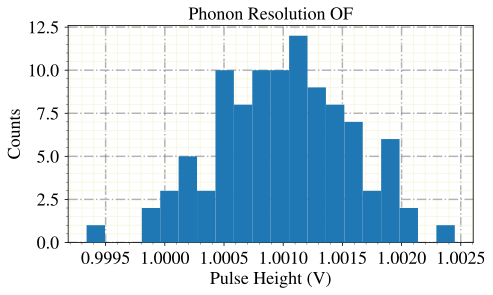

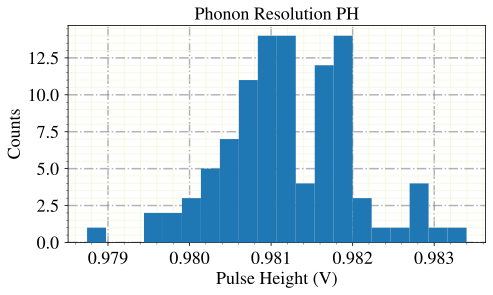

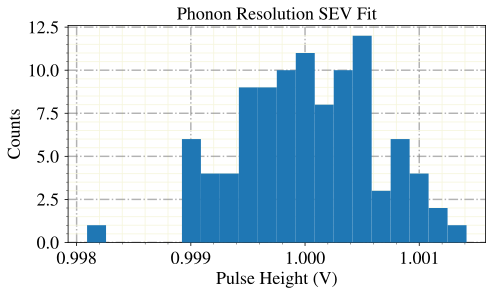

In [7]:
dh_res.show_values(group='events', key='of_ph', bins=20, idx0=0, 
               xlabel='Pulse Height (V)', ylabel='Counts', title='Phonon Resolution OF')
dh_res.show_values(group='events', key='mainpar', bins=20, idx0=0, idx2=0,
               xlabel='Pulse Height (V)', ylabel='Counts', title='Phonon Resolution PH')
dh_res.show_values(group='events', key='sev_fit_par', bins=20, idx0=0, idx2=0,
               xlabel='Pulse Height (V)', ylabel='Counts', title='Phonon Resolution SEV Fit')

In [4]:
resolutions_ph, mus_ph = dh_res.calc_resolution(pec_factors=None, ph_intervals=[(0,2), (0,2)], 
                                      use_tp=False, of_filter=False, sev_fit=False, fit_gauss=True)
resolutions_of, mus_of = dh_res.calc_resolution(pec_factors=None, ph_intervals=[(0,2), (0,2)], 
                                      use_tp=False, of_filter=True, sev_fit=False, fit_gauss=True)
resolutions_fit, mus_fit = dh_res.calc_resolution(pec_factors=None, ph_intervals=[(0,2), (0,2)], 
                                      use_tp=False, of_filter=False, sev_fit=True, fit_gauss=True)

Calculating resolution.
Resolution channel 0: 0.788 mV (mean 0.981 V, calculated with Pulse Heights)
Resolution channel 1: 1.12 mV (mean 0.999 V, calculated with Pulse Heights)
Calculating resolution.
Resolution channel 0: 0.564 mV (mean 1.0 V, calculated with Optimum Filter)
Resolution channel 1: 0.353 mV (mean 1.02 V, calculated with Optimum Filter)
Calculating resolution.
Resolution channel 0: 0.595 mV (mean 1.0 V, calculated with Standard Event Fit)
Resolution channel 1: 0.422 mV (mean 1.0 V, calculated with Standard Event Fit)


## Cut Efficiency

In [9]:
dh.simulate_pulses(path_sim='test_data/efficiency_001.h5',
                   size_events=100,  # should be below Nmbr of baselines, otherwise activate reuse_bl
                   reuse_bl=False,
                   ev_ph_intervals=[[0, 1], [0, 1]],
                   t0_interval=[-5, 5],
                   rms_thresholds=[0.1, 0.4],
                   fake_noise=False)

Simulating Events.
Get Baselines.
Get Pulse Heights.
Add Pulses to Baselines.
Store OF.
Simulation done.


In [4]:
dh_eff = ai.DataHandler(channels=[0,1])
dh_eff.set_filepath(path_h5='test_data/', fname='efficiency_001', appendix=False)

DataHandler Instance created.


In [5]:
dh_eff.calc_mp()

CALCULATE MAIN PARAMETERS.


In [6]:
survivors = ai.cuts.LogicalCut(dh_eff.get('events', 'mainpar')[0,:,0] > 0.2)  # threshold cut

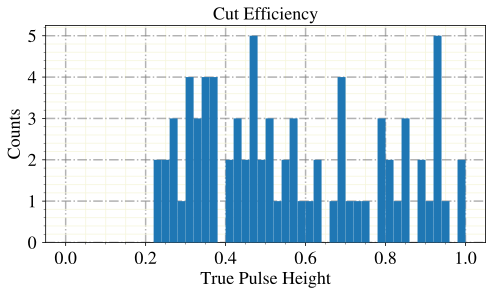

In [8]:
dh_eff.show_values(group='events',
                   key='true_ph',
                   title='Cut Efficiency',
                   xlabel='True Pulse Height',
                   ylabel='Counts',
                   cut_flag=survivors.get_idx(),
                   bins=50,
                   idx0=0,
                   range=(0,1))

## Supervised Machine Learning

In [4]:
dh.simulate_pulses(path_sim='test_data/absorbers_001.h5',
                   size_events=200,  
                   ev_ph_intervals=[[0, 3], [0, 3]],
                   t0_interval=[-20, 20],
                   rms_thresholds=[0.1, 0.4],
                   assign_labels=[1],
                   fake_noise=True,  # we simulate new baselines so we are not limited from the nmbr of baselines
                  )

Simulating Events.
Get Baselines.
Simulating Polynomials.
Calculating Polynomial NPS.
Simulating Noise with difference NPS.
Baselines simulated:  0
Baselines simulated:  10
Baselines simulated:  20
Baselines simulated:  30
Baselines simulated:  40
Baselines simulated:  50
Baselines simulated:  60
Baselines simulated:  70
Baselines simulated:  80
Baselines simulated:  90
Baselines simulated:  100
Baselines simulated:  110
Baselines simulated:  120
Baselines simulated:  130
Baselines simulated:  140
Baselines simulated:  150
Baselines simulated:  160
Baselines simulated:  170
Baselines simulated:  180
Baselines simulated:  190
Baselines simulated:  0
Baselines simulated:  10
Baselines simulated:  20
Baselines simulated:  30
Baselines simulated:  40
Baselines simulated:  50
Baselines simulated:  60
Baselines simulated:  70
Baselines simulated:  80
Baselines simulated:  90
Baselines simulated:  100
Baselines simulated:  110
Baselines simulated:  120
Baselines simulated:  130
Baselines simu

In [5]:
dh.simulate_pulses(path_sim='test_data/carriers_001.h5',
                   size_events=200,  
                   exceptional_sev_naming='stdevent_carrier',
                   channels_exceptional_sev=[0],
                   ev_ph_intervals=[[0, 3], [0, 0]],
                   t0_interval=[-20, 20],
                   rms_thresholds=[0.1, 0.4],
                   assign_labels=[8],
                   fake_noise=True,
                  )

Simulating Events.
Get Baselines.
Simulating Polynomials.
Calculating Polynomial NPS.
Simulating Noise with difference NPS.
Baselines simulated:  0
Baselines simulated:  10
Baselines simulated:  20
Baselines simulated:  30
Baselines simulated:  40
Baselines simulated:  50
Baselines simulated:  60
Baselines simulated:  70
Baselines simulated:  80
Baselines simulated:  90
Baselines simulated:  100
Baselines simulated:  110
Baselines simulated:  120
Baselines simulated:  130
Baselines simulated:  140
Baselines simulated:  150
Baselines simulated:  160
Baselines simulated:  170
Baselines simulated:  180
Baselines simulated:  190
Baselines simulated:  0
Baselines simulated:  10
Baselines simulated:  20
Baselines simulated:  30
Baselines simulated:  40
Baselines simulated:  50
Baselines simulated:  60
Baselines simulated:  70
Baselines simulated:  80
Baselines simulated:  90
Baselines simulated:  100
Baselines simulated:  110
Baselines simulated:  120
Baselines simulated:  130
Baselines simu

In [6]:
ai.data.merge_h5_sets(path_h5_a='test_data/absorbers_001.h5', 
                      path_h5_b='test_data/carriers_001.h5', 
                      path_h5_merged='test_data/labeled_001.h5', 
                      groups_from_a=['stdevent', 'optimumfilter'],
                      continue_hours=False,
                      keep_original_files=True)

--> MERGE GROUP: events.
SET: event.
creating ...
SET: mainpar.
SET: true_ph.
creating ...
SET: true_onset.
creating ...
SET: of_ph.
SET: sev_fit_par.
SET: sev_fit_rms.
SET: hours.
SET: labels.
creating ...
SET: testpulseamplitude.
SET: time_s.
SET: time_mus.
SET: pulse_height.
--> MERGE GROUP: testpulses.
--> MERGE GROUP: noise.
SET: event.
SET: mainpar.
SET: true_ph.
SET: true_onset.
SET: of_ph.
SET: sev_fit_par.
SET: sev_fit_rms.
SET: hours.
SET: labels.
SET: testpulseamplitude.
SET: time_s.
SET: time_mus.
SET: pulse_height.
--> MERGE GROUP: controlpulses.
COPY GROUP: stdevent.
SET: event.
creating ...
SET: fitpar.
creating ...
SET: mainpar.
creating ...
COPY GROUP: optimumfilter.
SET: optimumfilter_imag.
creating ...
SET: optimumfilter_real.
creating ...
Merge done.


In [7]:
dh_lab = ai.DataHandler()
dh_lab.set_filepath(path_h5='test_data/',
                fname='labeled_001',
                appendix=False)  # this specifies, that the file does not have a "-P_Ch0..." appendix

DataHandler Instance created.


In [8]:
dh_lab.calc_mp()

CALCULATE MAIN PARAMETERS.


In [9]:
dh_lab.apply_sev_fit(events_to_fit=400)

Calculating SEV Fit.


100%|██████████| 400/400 [01:20<00:00,  4.94it/s]


Done.


In [10]:
dh_lab.calc_additional_mp()

CALCULATE ADDITIONAL MAIN PARAMETERS.


In [11]:
dh_lab.apply_pca(nmbr_components=2)

Channel  0
Explained Variance:  [0.22544861 0.17492401]
Singular Values:  [150.56611037 132.62584417]
Channel  1
Explained Variance:  [0.67137074 0.21931592]
Singular Values:  [415.39039807 237.41619123]


In [21]:
ph = dh_lab.get('events', 'mainpar')[0,:,0]
ph_light = dh_lab.get('events', 'mainpar')[1,:,0]
decay_time = (dh_lab.get('events','mainpar')[0,:,6] - dh_lab.get('events','mainpar')[0,:,4])/dh_lab.sample_frequency
pca_proj = dh_lab.get('events', 'pca_projection')[0,:,:]

In [13]:
absorbers = ai.cuts.LogicalCut(initial_condition=decay_time > 0.004)
carriers = ai.cuts.LogicalCut(absorbers.get_antiflag())

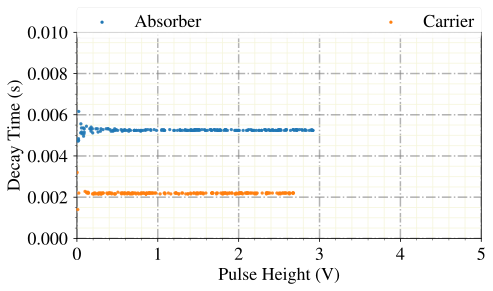

In [14]:
plt.close()
ai.styles.use_cait_style(dpi=150)
plt.scatter(ph[absorbers.get_flag()], decay_time[absorbers.get_flag()], marker='.', alpha=0.9, zorder=10, label='Absorber')
plt.scatter(ph[carriers.get_flag()], decay_time[carriers.get_flag()], marker='.', alpha=0.9, zorder=10, label='Carrier')
ai.styles.make_grid()
plt.xlabel('Pulse Height (V)')
plt.ylabel('Decay Time (s)')
plt.xlim([0,5])
plt.ylim([0,0.01])
legend = plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), mode="expand", borderaxespad=0., ncol=3)
for lh in legend.legendHandles:
    lh.set_alpha(1.0)
plt.show()

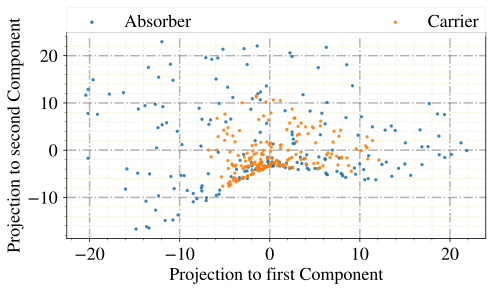

In [22]:
plt.close()
ai.styles.use_cait_style(dpi=150)
plt.scatter(pca_proj[absorbers.get_flag(),0], pca_proj[absorbers.get_flag(),1], marker='.', alpha=0.9, zorder=10, label='Absorber')
plt.scatter(pca_proj[carriers.get_flag(),0], pca_proj[carriers.get_flag(),1], marker='.', alpha=0.9, zorder=10, label='Carrier')
ai.styles.make_grid()
plt.xlabel('Projection to first Component')
plt.ylabel('Projection to second Component')
legend = plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), mode="expand", borderaxespad=0., ncol=3)
for lh in legend.legendHandles:
    lh.set_alpha(1.0)
plt.show()

## View Artificial Events

In [8]:
ei = ai.EventInterface(nmbr_channels=2)
ei.load_h5(path='test_data/', fname='labeled_001', channels=[0,1], appendix=False, which_to_label=['events'])
ei.create_labels_csv(path='test_data/')

Event Interface Instance created.
Nmbr triggered events:  400
No Testpulses in h5 file.
No noise in h5 file.
HDF5 File loaded.


Start labeling from idx 0.
Labels autosave to test_data/labels_labeled_001_.


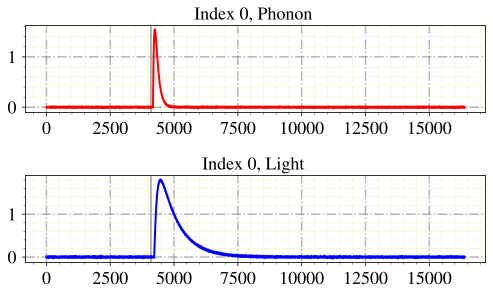

Label Phonon: 0.0
Label Light: 0.0
Assign label for event idx: 0 Phonon (q end, b back, n next, o options, i idx)
Phonon: n
Skipping this label.


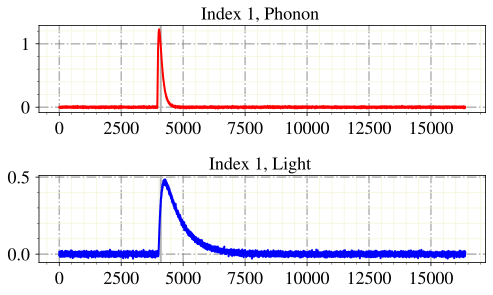

Label Phonon: 0.0
Label Light: 0.0
Assign label for event idx: 1 Phonon (q end, b back, n next, o options, i idx)
Phonon: idx
Enter Integer > 0 or q end, b back, n next, o options, i idx
Phonon: i
Jump to which index? 200
Jumping to index  200


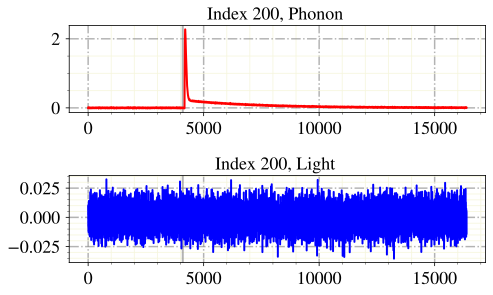

Label Phonon: 0.0
Label Light: 0.0
Assign label for event idx: 200 Phonon (q end, b back, n next, o options, i idx)
Phonon: n
Skipping this label.


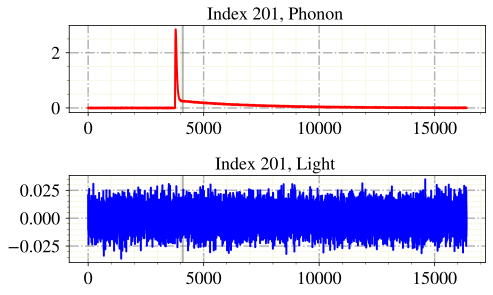

Label Phonon: 0.0
Label Light: 0.0
Assign label for event idx: 201 Phonon (q end, b back, n next, o options, i idx)
Phonon: n
Skipping this label.


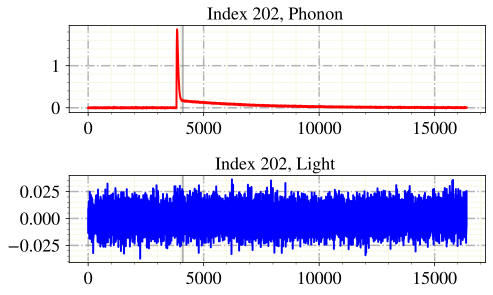

Label Phonon: 0.0
Label Light: 0.0
Assign label for event idx: 202 Phonon (q end, b back, n next, o options, i idx)
Phonon: q
End labeling.


In [9]:
ei.start(start_from_idx=0, print_label_list=False)